In [1]:
from MH import rosenbrock, pdf_rosenbrock
import zeus
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import emcee

In [108]:
def neg_rosenbrock(x):
    return -rosenbrock(x)

In [109]:
# set parameters for the MCMC
nwalkers = 100
ndim = 3

In [110]:
sampler = zeus.EnsembleSampler(nwalkers=nwalkers, ndim=ndim, logprob_fn = neg_rosenbrock)

In [111]:
# remove previous results if any
sampler.reset()

In [112]:
sampler.run_mcmc(start = np.random.rand(nwalkers,ndim), nsteps = 1000, progress = False)

Initialising ensemble of 100 walkers...


In [113]:
# flatten the chain
samples = sampler.get_chain(flat=True)
print (samples)
print ("Number of samples: ", len(samples))

[[ 0.79176254  0.13748623  0.33934573]
 [ 0.22435431 -0.0946496   0.09517046]
 [ 0.23058879 -0.11737102 -0.00558201]
 ...
 [ 0.55147258  0.33911339  0.11726254]
 [ 0.56394583  0.37365409  0.20773478]
 [ 0.50493239  0.29619658  0.02186657]]
Number of samples:  100000


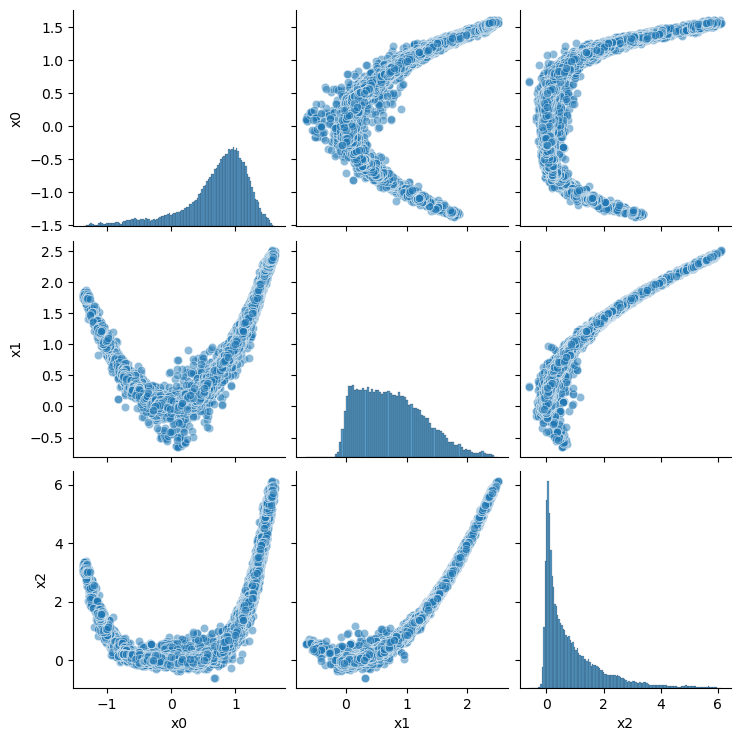

In [114]:
# plot the samples
chain = sampler.get_chain(flat = True)
df = pd.DataFrame(chain, columns=[f"x{i}" for i in range(ndim)])
sns.pairplot(df, plot_kws={'alpha': 0.5, 'marker': 'o'})
plt.show()


In [127]:
(type(sampler.summary))

Summary
-------
Number of Generations: 1000
Number of Parameters: 3
Number of Walkers: 100
Number of Tuning Generations: 16
Scale Factor: 0.311452
Mean Integrated Autocorrelation Time: 139.54
Effective Sample Size: 716.63
Number of Log Probability Evaluations: 562464
Effective Samples per Log Probability Evaluation: 0.001274


NoneType